# Heatmap associated with "HiPR-FISH Spatial Mapping of Cheese Rind Microbial Communities"

This notebook demonstrates how the spatial associaton heatmap in this pub was created.

## Load in and format the data

In [6]:
library(gplots)#load package for heatmap
sig=read.csv("../data/log2fcspatial.csv")#load spatial association data frame for rind across all cheeses
x=data.matrix(sig) #convert to numeric matrix
rownames(x)<-sig[,1] #add back rownames
x=x[,2:54] #remove unwanted column
x=x[rowSums(x[])!=0,colSums(x[])!=0] #remove rows with all 0's
x

,Agrococcus.casei,Ancrocorticia.populi,Brachybacterium.ginsengisoli,Brachybacterium.tyrofermentans,Brevibacterium.aurantiacum,Corynebacterium.terpenotabidum,Flaviflexus.ciconiae,Garicola.koreensis,Microbacterium.faecale,Microbacterium.halophytorum,⋯,Debaryomyces.sp,Geotrichum.candidum.1,Geotrichum.candidum.3,Geotrichum.candidum.5,Torulaspora,Paracoccidioides.lutzii,Fusarium.solani,Graphium.fructicola,Nectria.cinnabarina,Neonectria.neomacrospora
Agrococcus casei,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,⋯,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
Ancrocorticia populi,0.0000000,1.22373957,-0.85226524,0.0000000,0.000000,-0.2773897,-1.2963106,0.0000000,-1.68562624,0.0000000,⋯,0.49005085,-1.9883428,0.0000000,0.0000000,0.6631454,0.0000000,0.5965505,-0.548601,0.000000,0.5228408
Brachybacterium ginsengisoli,0.0000000,-0.85226524,0.39503564,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,-0.01149564,0.0000000,⋯,0.00000000,-1.9879272,0.0000000,0.0000000,1.7036894,-0.2868811,1.3028193,0.000000,0.000000,0.0000000
Brachybacterium tyrofermentans,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,⋯,0.00000000,-1.6015381,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,3.7958593
Brevibacterium aurantiacum,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,⋯,0.00000000,3.1328943,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
Corynebacterium terpenotabidum,0.0000000,-0.27738970,0.00000000,0.0000000,0.000000,0.0000000,3.5734669,0.0000000,0.00000000,0.0000000,⋯,0.00000000,0.0000000,0.0000000,0.0000000,3.7178568,0.0000000,0.0000000,0.000000,0.000000,0.0000000
Flaviflexus ciconiae,0.0000000,-1.29631056,0.00000000,0.0000000,0.000000,3.5734669,2.1584294,0.0000000,0.71785677,0.0000000,⋯,0.00000000,0.0000000,0.0000000,0.0000000,1.7305678,0.0000000,3.3808218,0.000000,0.000000,0.0000000
Garicola koreensis,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0.0000000,0.0000000,2.0913152,0.00000000,0.0000000,⋯,0.00000000,-1.6396952,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
Microbacterium faecale,0.0000000,-1.68562624,-0.01149564,0.0000000,0.000000,0.0000000,0.7178568,0.0000000,1.07062345,0.0000000,⋯,-0.66721091,-1.8447874,0.0000000,0.0000000,1.8534633,-0.1018421,1.5079930,0.000000,0.000000,0.0000000
Microbacterium halophytorum,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,⋯,0.00000000,0.7759597,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000


## Plot the spatial association heatmap

This heatmap shows the positive or negative spatial association of microbial species based on the difference in association that was observed compared to what might expected by random chance.

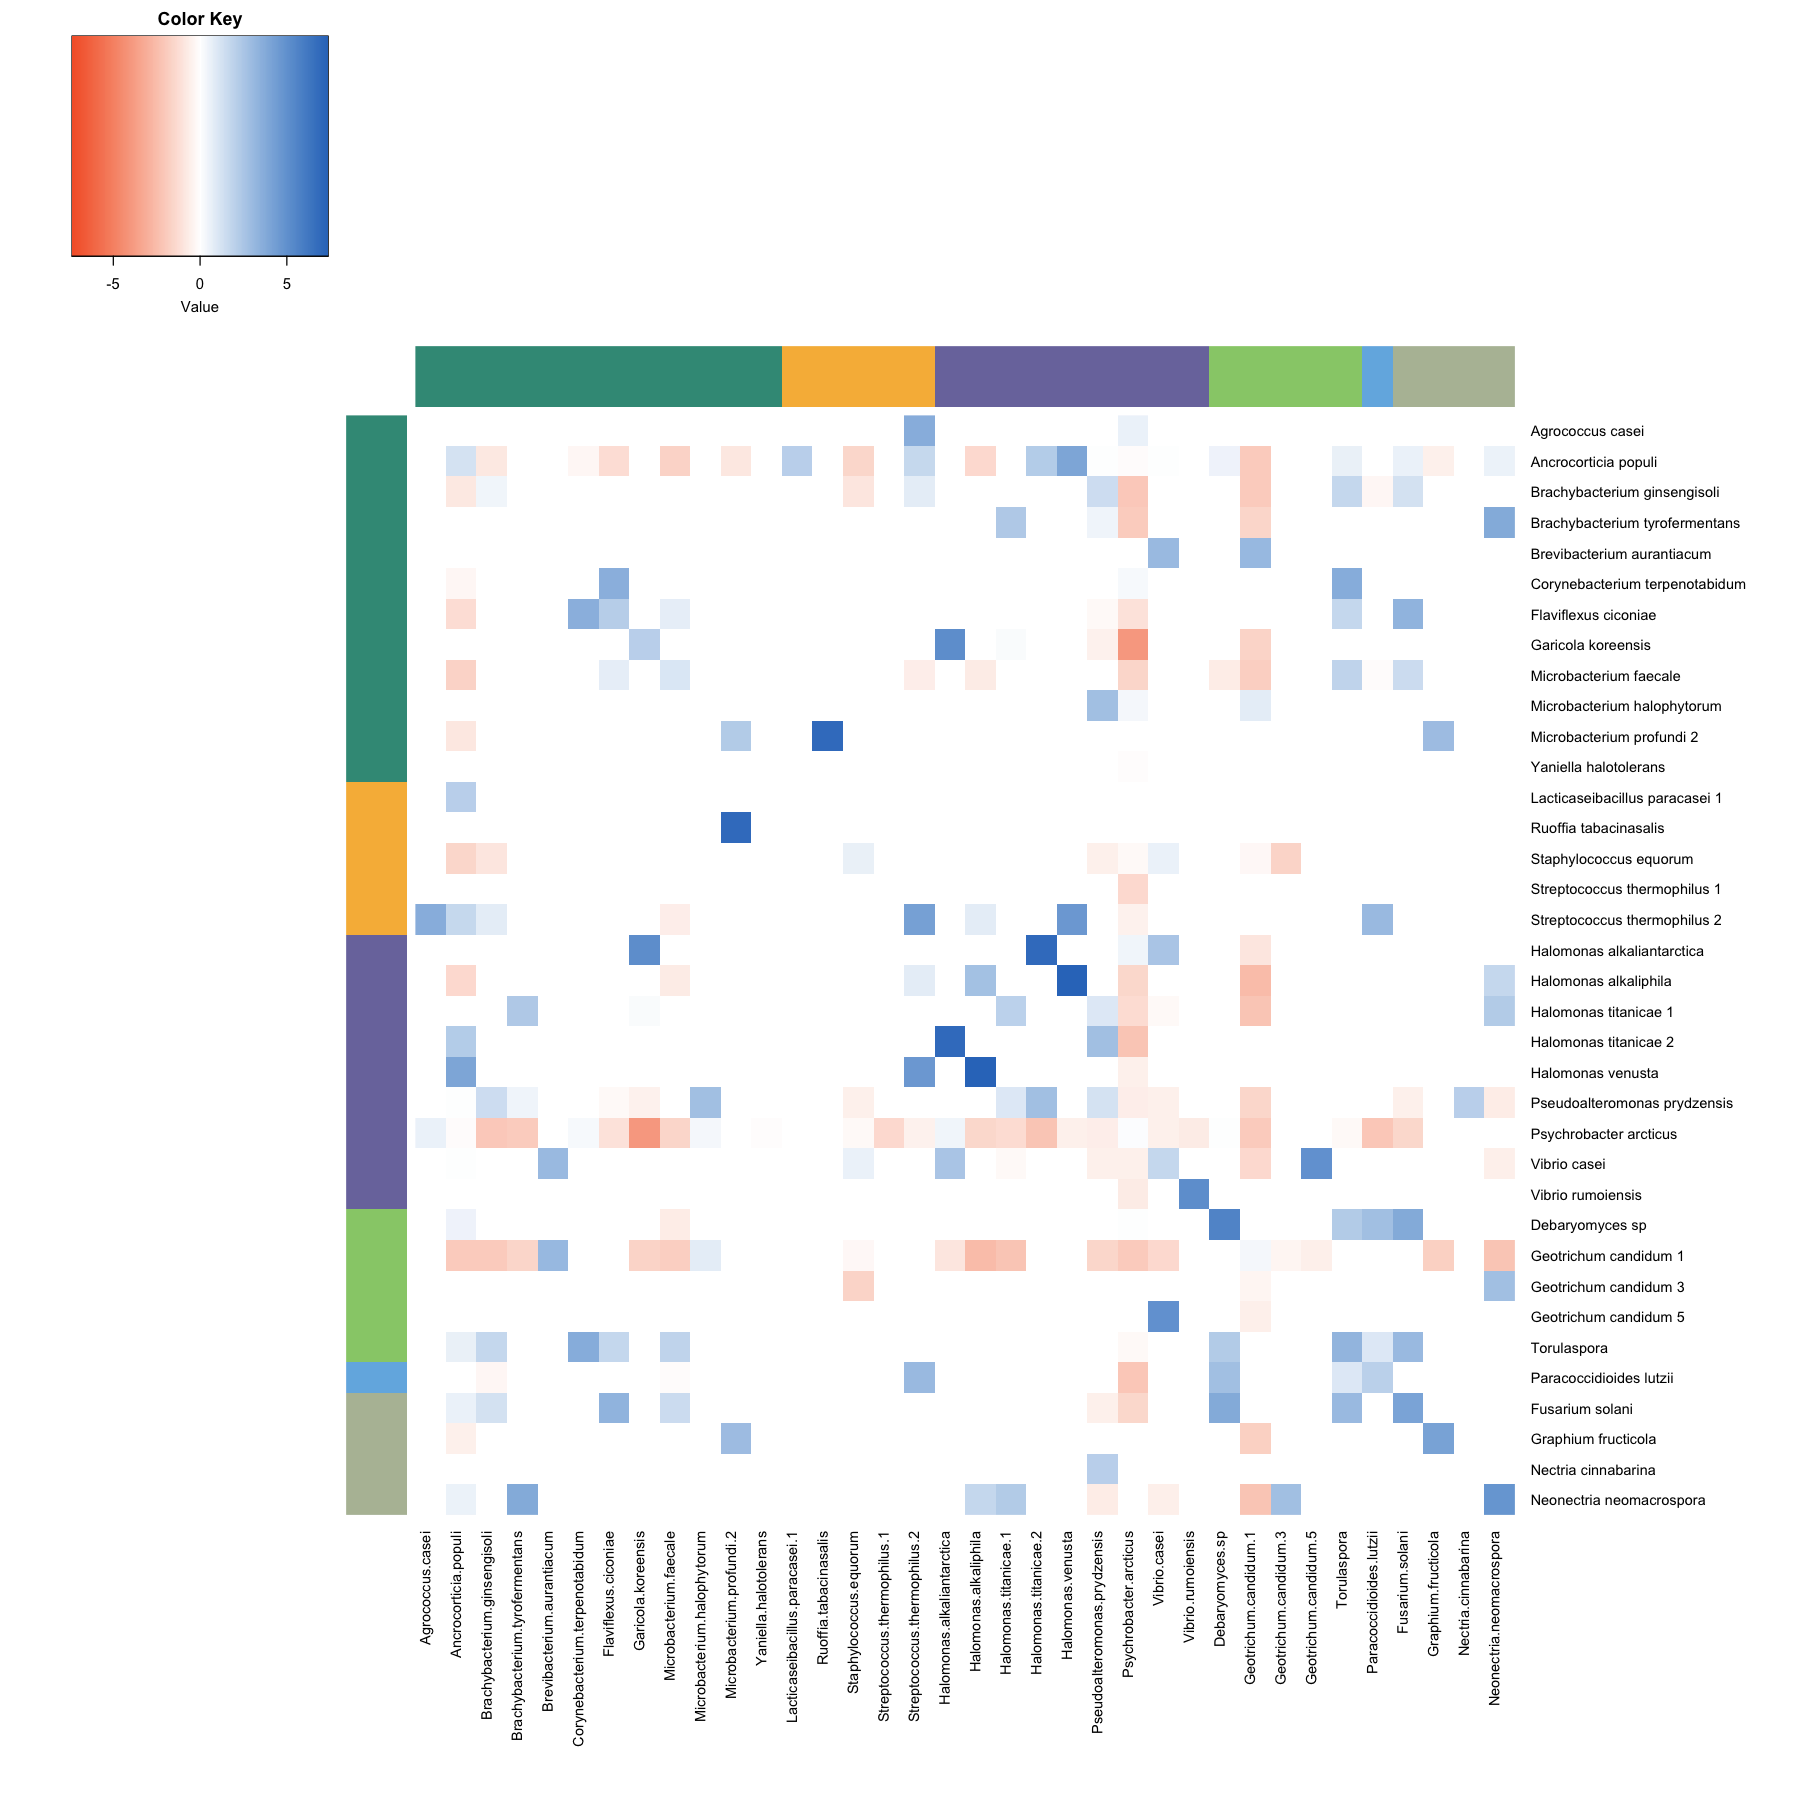

In [7]:
my_palette <- colorRampPalette(c("#f56233", "white", "#3178c4"))(n = 299) #set color palette
options(repr.plot.width=15, repr.plot.height=15) #set plot dimensions

#plot heatmap.  color bars on the top and bottom are based on phylogeny.
heatmap.2(x,Colv = F,Rowv=F,trace="none",col=my_palette,density.info=c("none"),keysize = 1,
  margins =c(18,18),cexRow=1.1,cexCol=1.1,dendrogram = c("none"), ColSideColors=c("#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#73B5E3","#B5BEA4","#B5BEA4","#B5BEA4","#B5BEA4"),RowSideColors=c("#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#73B5E3","#B5BEA4","#B5BEA4","#B5BEA4","#B5BEA4"))




In [8]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/emilycpweiss/miniconda3/envs/jupyter/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gplots_3.1.3

loaded via a namespace (and not attached):
 [1] gtools_3.9.4       fansi_1.0.4        crayon_1.5.2       digest_0.6.31     
 [5] utf8_1.2.3         bitops_1.0-7       IRdisplay_1.1      repr_1.1.6        
 [9] lifecycle_1.0.3    jsonlite_1.8.4     evaluate_0.20      KernSmooth_2.23-20
[13] pillar_1.8.1       rlang_1.0.6        cli_3.6.0          uuid_1.1-0        
[17] vctrs_0.5.2        IRkernel_1.3.2     tools_4.2.2        glue_1.6.2        
[21] fastmap_1.1.1      compiler_4.2.2     base64enc_0.1-3    caTools_1.18.2    
[25] pbdZMQ_0.3-9       ht